## Ahmed Mahgoub's Notebook

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, classification_report, accuracy_score
import matplotlib.pyplot as plt
from io import BytesIO
import base64

In [ ]:
# Convert to DataFrame (in practice, this would be loaded from the provided CSV)
df = pd.read_csv('clean_Tweets.csv')  # Assuming the file is accessible

# TF-IDF Feature Extraction
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['text']).toarray()
y = df['airline_sentiment']



In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Training Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train, y_train)

# Predictions
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)
y_test_proba = rf_classifier.predict_proba(X_test)

In [ ]:
# Calculating metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.91      0.85      1816
     neutral       0.62      0.44      0.51       612
    positive       0.69      0.60      0.65       458

    accuracy                           0.76      2886
   macro avg       0.71      0.65      0.67      2886
weighted avg       0.75      0.76      0.75      2886



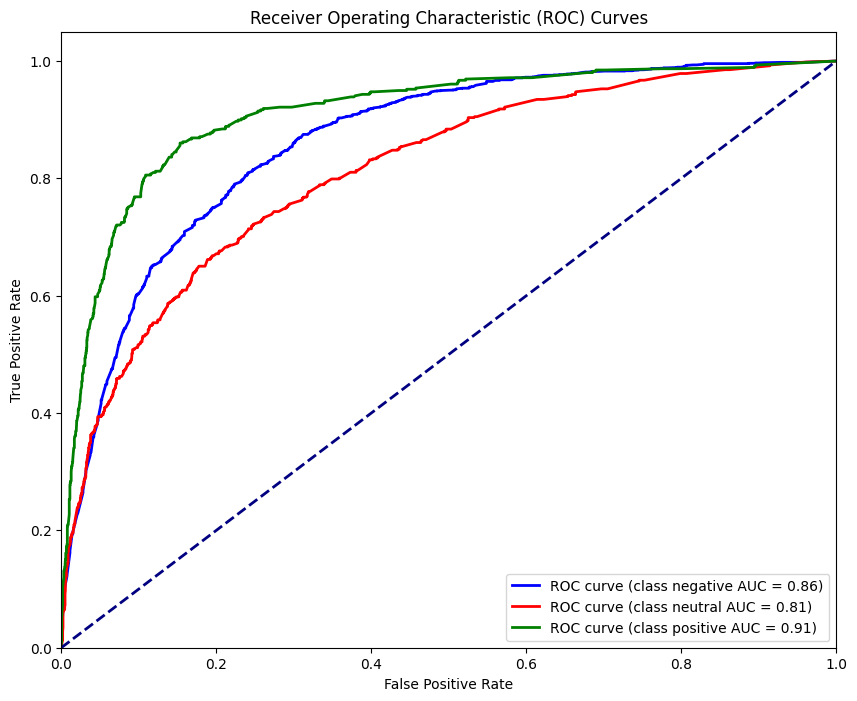

In [ ]:
# ROC Curve and AUC (for multi-class, we use one-vs-rest approach)
plt.figure(figsize=(10, 8))
classes = np.unique(y)
n_classes = len(classes)
colors = ['blue', 'red', 'green']

# Binarize the output for ROC
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=classes)
y_pred_proba = rf_classifier.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'ROC curve (class {classes[i]} AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")

In [ ]:
# Print metrics
print("\nModel Performance Metrics:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Model Performance Metrics:
Train Accuracy: 0.9931
Test Accuracy: 0.7585
Precision: 0.7451
Recall: 0.7585
F1 Score: 0.7458
